Compute only $\chi$ and F from data to get time frame of computing the essentials

In [ ]:
# Import necessary libraries
import numpy as np
import glob

# Import external background functions
%run background_functions.py

In [2]:
# Import HCP data
# Importing all matrices with Numpy
matrices = [np.genfromtxt(file) for file in glob.glob('./1000_Functional_Connectomes/Connectivity matrices/*_matrix_file.txt')]

# Generate an averaged matrix
MatAv = np.zeros(shape=matrices[0].shape)
for matrix in matrices:
    MatAv += matrix
averaged_matrix = MatAv/len(matrices)

In [78]:
# Define desired settings
cutoff=0.7 # Value between 0 and 1. Values below this value are set to zero. Becomes obsolete after including phase randomisation
max_dim=4
M = averaged_matrix

In [79]:
# Compute the clique complex and Euler Characteristic
%time euler_characteristic, clique_complex = compute_euler(M,cutoff,max_dim)

CPU times: total: 15.6 ms
Wall time: 5.27 ms


In [80]:
# Generate the connectivity matrix L from the clique complex
%time inverse_connectivity_matrix = generate_inverse_connectivity_matrix(clique_complex)

CPU times: total: 0 ns
Wall time: 4.98 ms


In [81]:
# Compute the Helmholtz free energy
%time U_min, p_Umin, S_max, p_Smax, Free_energy = free_energy(inverse_connectivity_matrix, 1)

CPU times: total: 0 ns
Wall time: 69.9 ms


C:\Users\cyril\Documents\GitHub\Free_energy_of_simplicial_complexes\background_functions.py:34: RuntimeWarning: overflow encountered in exp
  if new_value < current_value or np.random.rand() > np.exp((new_value - current_value) / temperature):


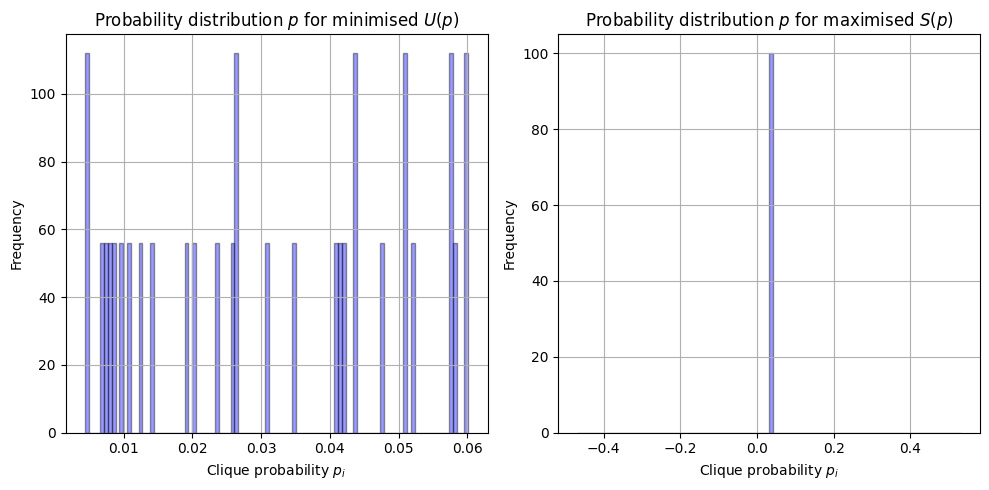

In [82]:
# Plotting the probability distribution
plt.figure(figsize=(10, 5))

# Plot the energy/entropy evolution against the number of Simulated Annealing iterations

plt.subplot(1, 2, 1)
plt.hist(p_Umin, bins=100, density=True, alpha=0.4, color='blue', edgecolor='black')
plt.xlabel('Clique probability $p_i$')
plt.ylabel('Frequency')
plt.title('Probability distribution $p$ for minimised $U(p)$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(p_Smax, bins=100, density=True, alpha=0.4, color='blue', edgecolor='black')
plt.xlabel('Clique probability $p_i$')
plt.ylabel('Frequency')
plt.title('Probability distribution $p$ for maximised $S(p)$')
plt.grid(True)

plt.tight_layout()
plt.show()

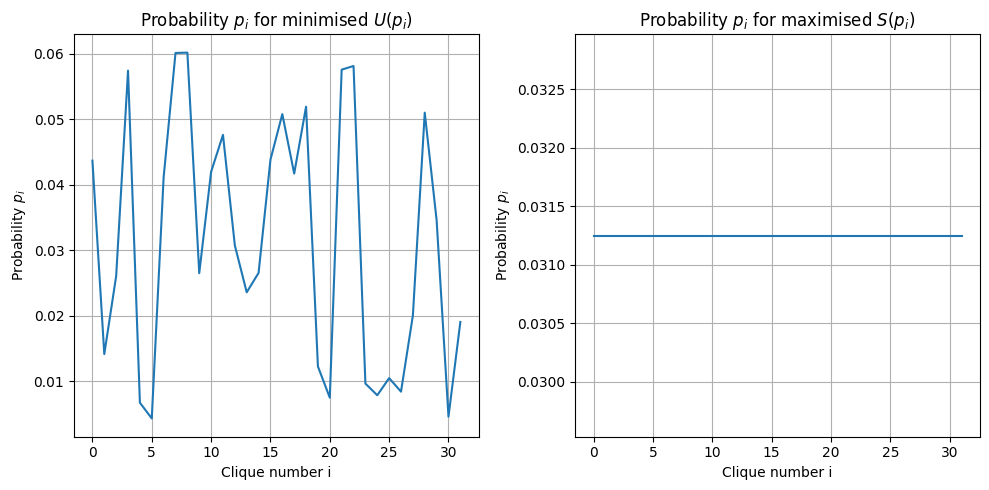

In [83]:
# Plotting the probability distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(p_Umin)
plt.xlabel('Clique number i')
plt.ylabel('Probability $p_i$')
plt.title('Probability $p_i$ for minimised $U(p_i)$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(p_Smax)
plt.xlabel('Clique number i')
plt.ylabel('Probability $p_i$')
plt.title('Probability $p_i$ for maximised $S(p_i)$')
plt.grid(True)

plt.tight_layout()
plt.show()